In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.model_selection import train_test_split

In [2]:
X,y=make_regression(n_samples=200,n_features=1,noise=40,n_targets=1,random_state=42)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
lr=LinearRegression()
lr.fit(X_train,y_train)
print("Linear Regression Coefficients:", lr.coef_)
print("Linear Regression Intercept:", lr.intercept_)

Linear Regression Coefficients: [85.28577676]
Linear Regression Intercept: 4.89220436935847


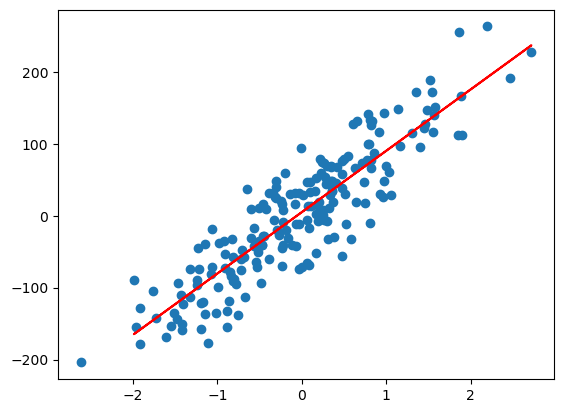

In [6]:
plt.scatter(X,y)
plt.plot(X_train,lr.predict(X_train),color='red')

C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.277e+05, tolerance: 1.228e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_m

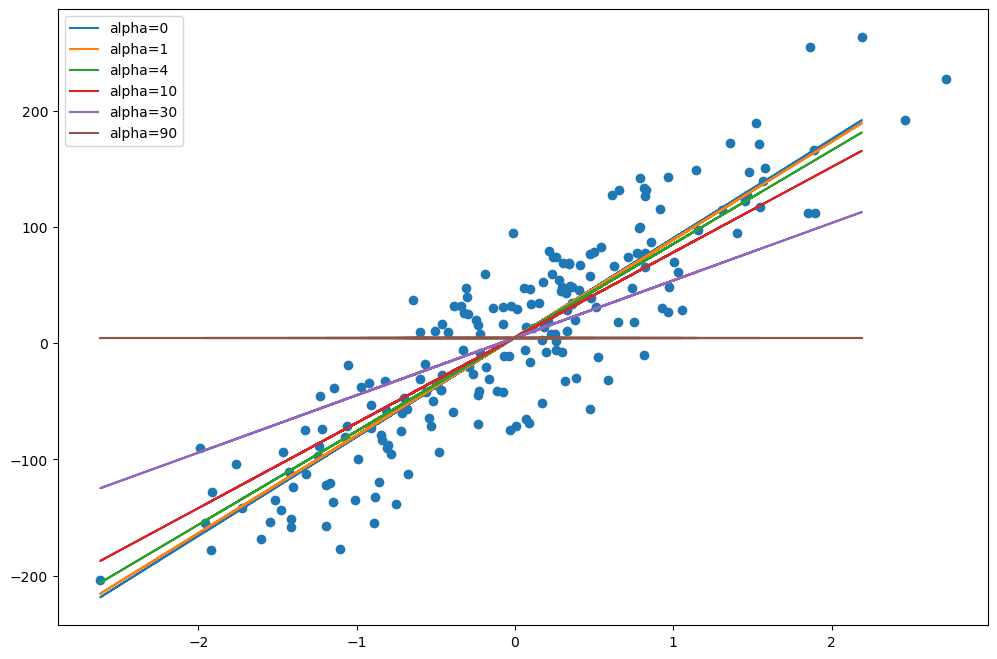

In [8]:
alphas=[0,1,4,10,30,90]
plt.figure(figsize=(12,8))
plt.scatter(X,y)
for i in alphas:
    l=Lasso(alpha=i)
    l.fit(X_train,y_train)
    plt.plot(X_test,l.predict(X_test),label='alpha='+str(i))
plt.legend()
plt.show()

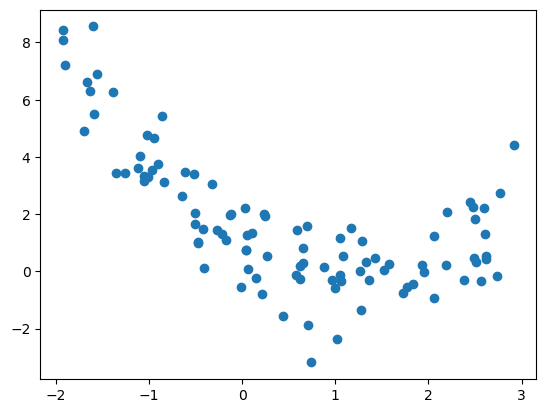

In [9]:
m=100
x1=5*np.random.rand(m,1) - 2
x2=0.8 * x1**2 - 2*x1 +1 +np.random.randn(m,1)
plt.scatter(x1,x2)
plt.show()

C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.269e+01, tolerance: 5.597e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_m

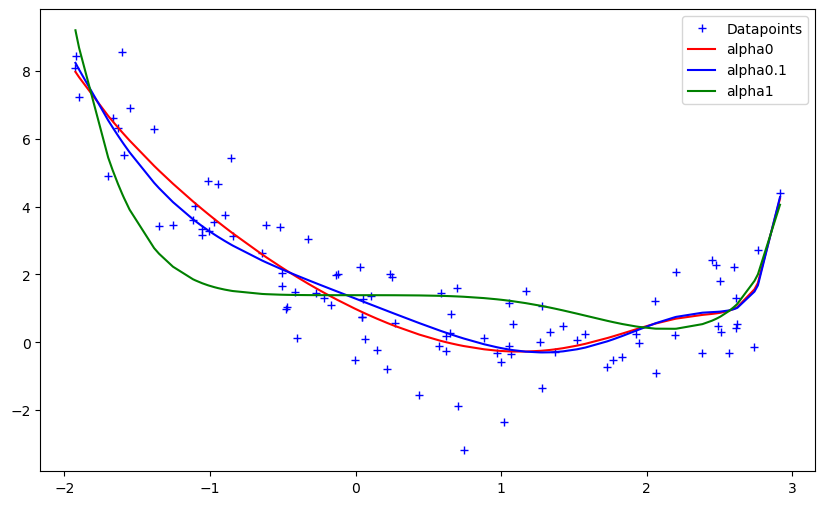

In [10]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

def get_preds_lasso(x1,x2,alpha):
    model =Pipeline([
        ('poly_features',PolynomialFeatures(degree=16)),
        ('lasso',Lasso(alpha=alpha))
    ])
    model.fit(x1,x2)
    return model.predict(x1)

alphas=[0,0.1,1]
cs=['r','b','g']

plt.figure(figsize=(10,6))
plt.plot(x1,x2,'b+',label='Datapoints')

for alpha,c in zip(alphas,cs):
    preds=get_preds_lasso(x1,x2,alpha)
    # plot
    plt.plot(sorted(x1[:,0]),preds[np.argsort(x1[:,0])],c,label=f'alpha{alpha}')

plt.legend()
plt.show()

## how are coefficient affected ?

In [11]:
from sklearn.datasets import load_diabetes

from sklearn.metrics import r2_score, mean_squared_error


In [15]:
data=load_diabetes()

df=pd.DataFrame(data.data,columns=data.feature_names)
df['target']=data.target

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [17]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

In [18]:
coef=[]
r2_scores=[]
for i in [0,0.1,1,10,100]:
    reg=Lasso(alpha=i)
    reg.fit(X_train,y_train)
    
    coef.append(reg.coef_.tolist())
    y_pred=reg.predict(X_test)
    r2_scores.append(r2_score(y_test,y_pred))

C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.063e+05, tolerance: 2.145e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_m

Text(0.5, 1.0, 'alpha =0, r2_score=-0.01')

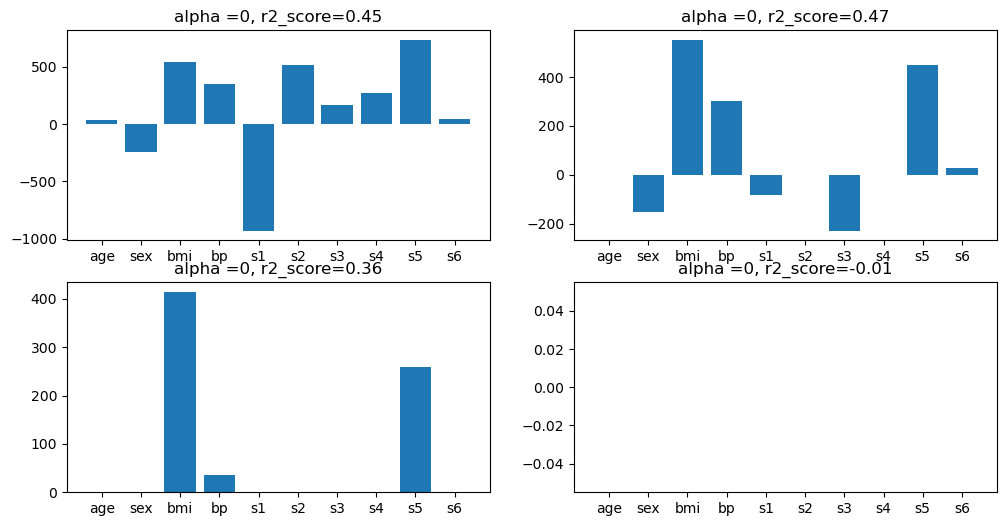

In [20]:
plt.figure(figsize=(12,6))
plt.subplot(221)
plt.bar(data.feature_names,coef[0],label='alpha=0')
plt.title('alpha =0, r2_score={}'.format(round(r2_scores[0],2)))

plt.subplot(222)
plt.bar(data.feature_names,coef[1],label='alpha=0')
plt.title('alpha =0, r2_score={}'.format(round(r2_scores[1],2)))

plt.subplot(223)
plt.bar(data.feature_names,coef[2],label='alpha=0')
plt.title('alpha =0, r2_score={}'.format(round(r2_scores[2],2)))


plt.subplot(224)
plt.bar(data.feature_names,coef[3],label='alpha=0')
plt.title('alpha =0, r2_score={}'.format(round(r2_scores[3],2)))

### 2. Higher coefficient are affected more 

In [23]:
alphas=[0,0.00001,0.001,0.01,0.1,1,10,100,1000,10000]
coefs=[]

for i in alphas:
    reg=Lasso(alpha=i)
    reg.fit(X_train,y_train)
    coefs.append(reg.coef_)

C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.063e+05, tolerance: 2.145e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_m

In [24]:
input_array=np.array(coefs)

coef_df=pd.DataFrame(input_array,columns=data.feature_names)
coef_df['alpha']=alphas
coef_df.set_index('alpha')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
alpha,,,,,,,,,,
0.00000,37.904021,-241.964362,542.428759,347.703844,-931.488838,518.062271,163.419980,275.317901,736.198856,48.670657
0.00001,37.902786,-241.955750,542.438338,347.695948,-930.823117,517.559339,163.100384,275.189743,735.955217,48.672593
0.00100,37.780431,-241.103200,543.386372,346.914418,-864.934721,467.782935,131.468467,262.504646,711.841733,48.864159
0.01000,35.347451,-231.906664,551.303242,341.313469,-483.567140,165.990532,-25.834899,216.875803,566.815003,49.702475
0.10000,0.000000,-152.664779,552.697775,303.365158,-81.365007,-0.000000,-229.255776,0.000000,447.919525,29.642617
1.00000,0.000000,-0.000000,413.431848,34.830515,0.000000,0.000000,-0.000000,0.000000,258.152894,0.000000
10.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
100.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
1000.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


In [38]:
alphas=[0,0.00001,0.001,0.01,0.1,1,5,10,14]
coefs=[]

for i in alphas:
    reg=Lasso(alpha=i)
    reg.fit(X_train,y_train)
    coefs.append(reg.coef_)
    

C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.063e+05, tolerance: 2.145e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_m

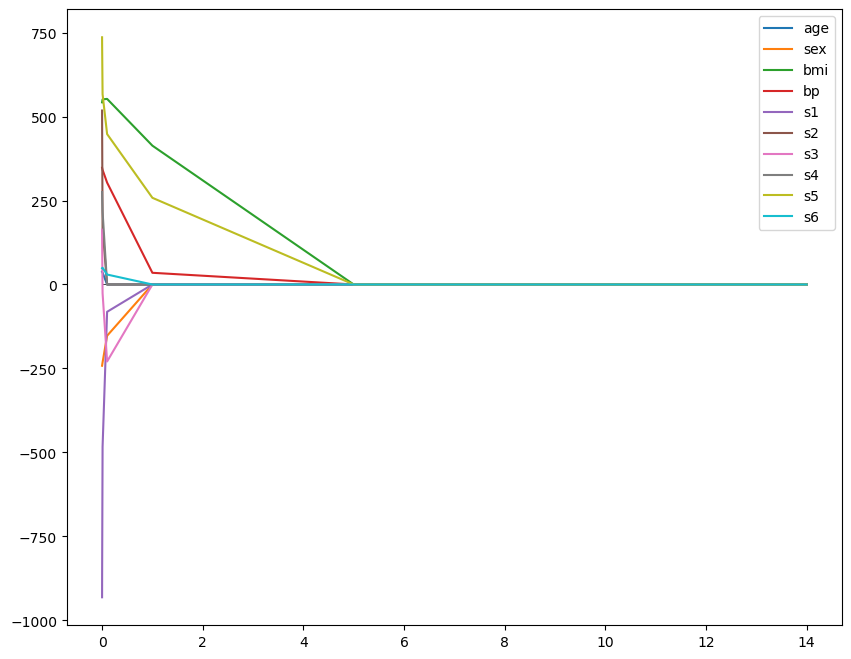

In [39]:
input_array=np.array(coefs)
plt.figure(figsize=(10,8))
plt.plot(alphas,np.zeros(len(alphas)),color='black',linewidth=0.5)
for i in range(input_array.shape[1]):
    plt.plot(alphas,input_array[:,i],label=data.feature_names[i])
plt.legend()